# Movie Recommendation System

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titles = ['user_id','item_id','rating','timestamp']

In [3]:
movies = pd.read_csv('u.data',sep = '\t',names=titles)

In [4]:
movies.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movies = pd.merge(movies,pd.read_csv('Movie_Id_Titles'),on='item_id')

In [6]:
movies.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [7]:
movies.groupby('title')['rating'].mean().sort_values(ascending = False) # We got average rating of evey movie in descending order

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

***Many of the movies may have a very less number of ratings, so we would need them to be sorted by the number of ratings***

In [8]:
# Now we create a new dataframe "ratings" containing number of ratings ans average rating for a movie
ratings = pd.DataFrame(movies.groupby('title')['rating'].mean())
ratings['num of ratings'] = movies.groupby('title')['rating'].count()

In [9]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


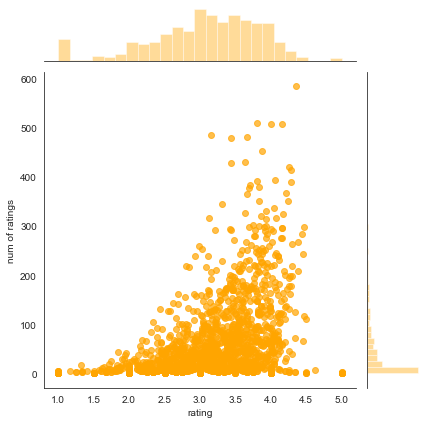

In [10]:
sns.set_style('white')
sns.jointplot(y = 'num of ratings',x = 'rating',data = ratings,alpha = 0.7,color = 'orange')

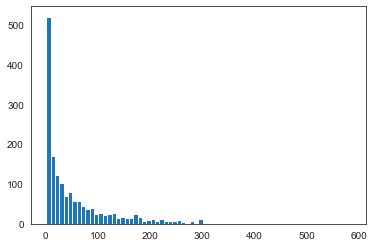

In [11]:
plt.hist(ratings['num of ratings'],bins = 70)
plt.show()

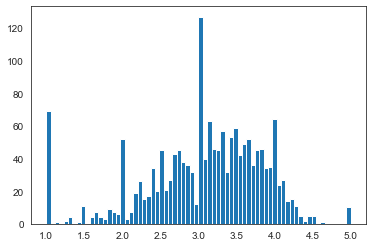

In [12]:
plt.hist(ratings['rating'],bins = 70)
plt.show()

Now we know we have two dataframes:

    Movies - having details of movies
    Ratings - having rating details of the movies
### Now we would create a recommendation system based off of the above data analysis

Create a matrix having:
    
    - user id on one axis
    - movie title on another
    - cells consist of rating for the movie by a particular movie

In [13]:
movie_mat = movies.pivot_table(index = 'user_id',columns='title',values='rating')

In [14]:
movie_mat.head() #Most of the values are NULL as many of the people haven't watched the movie

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ratings.sort_values('num of ratings',ascending=False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


We choose two movies out of these and create a recommendation system for people who liked the movie

    -Star wars 
    -Liar Liar

In [16]:
star_wars_ratings = movie_mat['Star Wars (1977)']
liar_liar_ratings = movie_mat['Liar Liar (1997)']
# Drop na in oreder to drop the users who did not watch the movie

In [17]:
similar_to_starwars = movie_mat.corrwith(star_wars_ratings) 
# We get co relation of every value of rating with star_wars_ratings to know how much that particular person would like the movie

C:\Users\Himanshu\Miniconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Himanshu\Miniconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [18]:
similar_to_liar_liar = movie_mat.corrwith(liar_liar_ratings)

In [19]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace = True)

In [20]:
corr_starwars 
#In this table, we find the similarity of any movie with star wars according to the viewers
#Now if we sort it in desceding oreder, we must be able to see the most resembling movies to Star Wars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [21]:
corr_starwars.sort_values('Correlation',ascending = False)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
...,...
For Ever Mozart (1996),-1.0
Frankie Starlight (1995),-1.0
I Like It Like That (1994),-1.0


In [22]:
# Now this data may or may not make any sense as these may be rated by a few people

In [23]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])

In [24]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending = False)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [25]:
corr_liarliar = pd.DataFrame(similar_to_liar_liar,columns=['Correlation'])

In [26]:
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])

In [27]:
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending = False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
